In [208]:
import numpy             as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial        import Delaunay
from scipy.interpolate    import LinearNDInterpolator
from scipy.interpolate    import CloughTocher2DInterpolator
from scipy.interpolate    import NearestNDInterpolator

In [210]:
from invisible_cities.icaro.hst_functions import display_matrix

In [19]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 12, 8
plt.rcParams[  "font.size"   ] = 20

In [56]:
xdata   = np.linspace(0.0,  99, 10)
ydata   = np.linspace(0.5, 0.6, 11)
xydata  = np.stack([a.flatten() for a in np.meshgrid(xdata, ydata)], axis=1)

reduce  = lambda x: np.sqrt((x[0]/100)**2 + x[1]**2)
reduce  = lambda x: x[0]*2*np.pi/100
reduce  = lambda x: (x[0] - 50)**2/50**2 + (x[1]-0.555)**2/0.05**2
zdata   = np.sin(np.apply_along_axis(reduce, 1, xydata))

xyzdata = np.stack([*xydata.T, zdata], axis=1)

In [77]:
d = Delaunay(xyzdata)
i = LinearNDInterpolator(xydata, zdata)

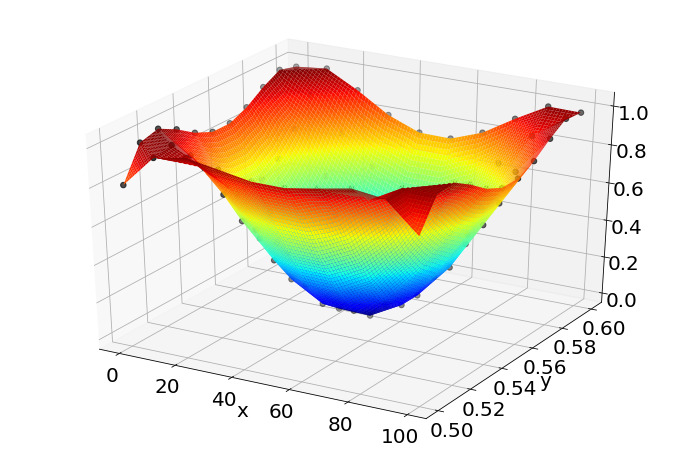

In [146]:
ax  = plt.axes(projection='3d')

x, y, z = xyzdata.T
ax.scatter(x, y, z, marker="o", s=30, c="k")
plt.xlabel("x")
plt.ylabel("y")

x_data   = np.linspace(0.0,  99, 100)
y_data   = np.linspace(0.5, 0.6, 101)
x, y     =  np.meshgrid(x_data, y_data)
z        = i(x, y)

ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)

In [152]:
import invisible_cities.reco.dst_functions as dstf

xymap = dstf.load_xy_corrections("/Users/Gonzalo/github/NEXTdata/XYmaps/corrections_run4734.h5",
                                 group = "XYcorrections",
                                 node  = "Geometry_6.7mm")

/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


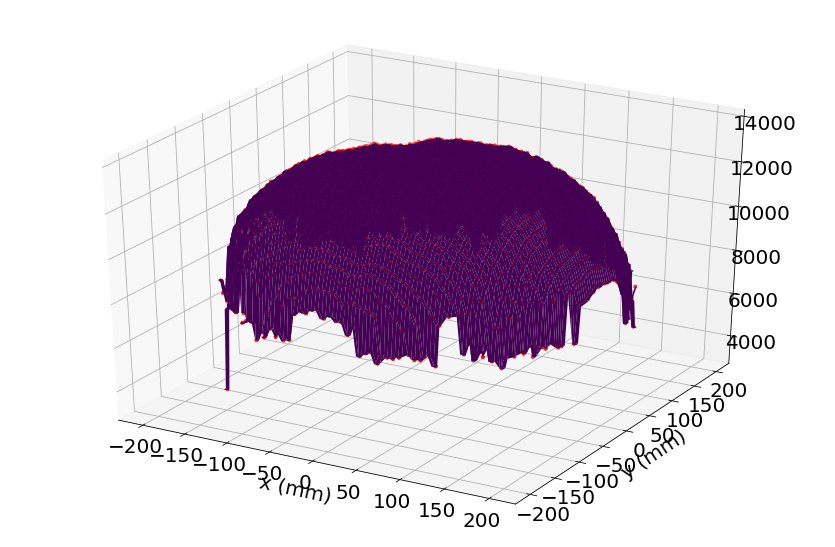

In [209]:
ax  = plt.axes(projection='3d')

xp, yp, zp  = *xymap._xs, xymap._fs.flatten()
xp, yp, zp  = np.repeat(xp, yp.size), np.tile(yp, xp.size), np.where(zp==0, np.nan, zp)
interpolate = NearestNDInterpolator(np.stack([xp, yp], axis=1), zp)
#interpolate = CloughTocher2DInterpolator(np.stack([xp, yp], axis=1), zp)
#interpolate = LinearNDInterpolator(np.stack([xp, yp], axis=1), zp)

x, y = np.linspace(-200, 200, 100), np.linspace(-200, 200, 100)
x, y = np.repeat(x, y.size).reshape(x.size, y.size), np.tile(y, x.size).reshape(x.size, y.size)
z    = interpolate(x, y)

ax.scatter(xp, yp, zp, marker="o", c="r", s=10, facecolors=None)
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")


ax.plot_surface(x, y, z, cmap=plt.cm.viridis, rstride=1, cstride=1, linewidth=0)

plt.tight_layout()

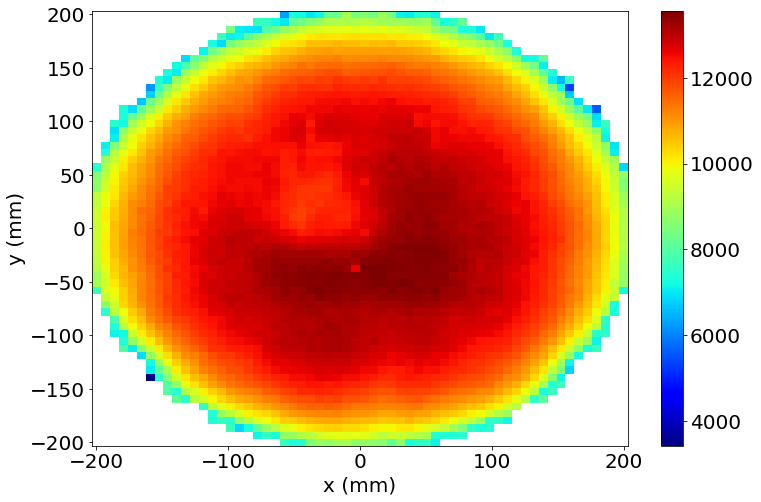

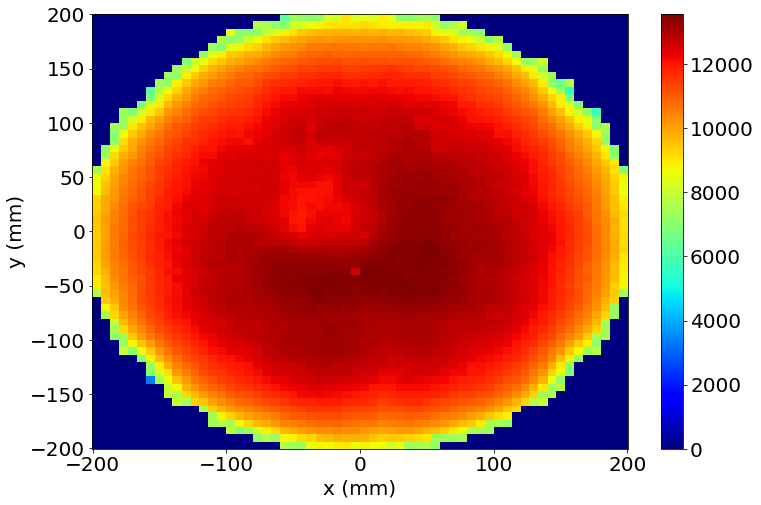

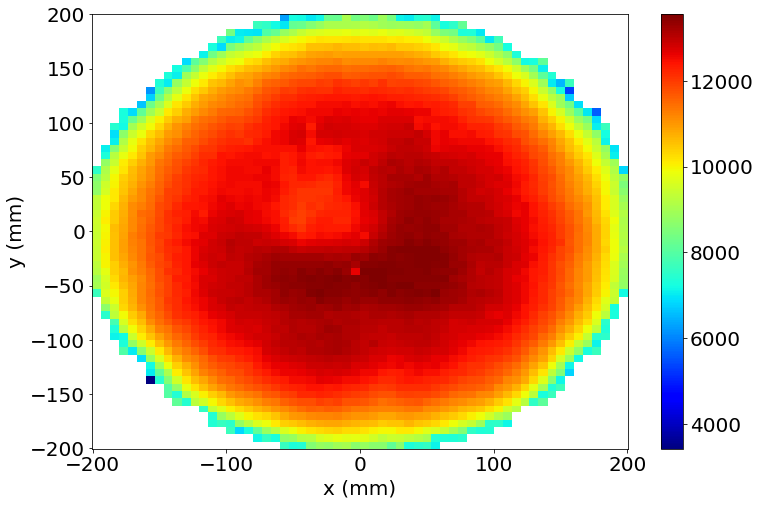

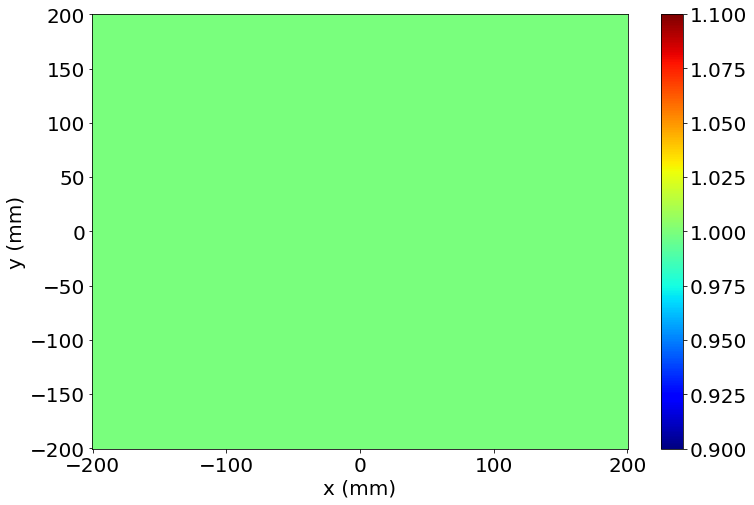

In [225]:
xp0, yp0, zp0 = *xymap._xs, xymap._fs.flatten()
xp, yp, zp    = np.repeat(xp0, yp0.size), np.tile(yp0, xp0.size), np.where(zp0==0, np.nan, zp0)
interpolate   = NearestNDInterpolator(np.stack([xp, yp], axis=1), zp)
#interpolate   = CloughTocher2DInterpolator(np.stack([xp, yp], axis=1), zp)
#interpolate   = LinearNDInterpolator(np.stack([xp, yp], axis=1), zp)

x0, y0 = np.linspace(-200, 200, 1000), np.linspace(-200, 200, 1000)
x, y   = np.repeat(x0, y0.size).reshape(x0.size, y0.size), np.tile(y0, x0.size).reshape(x0.size, y0.size)
z      = interpolate(x, y)
zzz    = xymap(x.flatten(), y.flatten()).value

display_matrix(xp0, yp0, zp, cmap="jet")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

display_matrix(x0, y0, zzz, cmap="jet")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

display_matrix(x0, y0, z , cmap="jet")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

r = z.flatten()/zzz
r = np.where(~np.isnan(r) & np.isfinite(r), r, 1)
display_matrix(x0, y0, r, cmap="jet")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

In [167]:
a = np.arange(5)

In [189]:
np.repeat(a, 5)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4])

In [190]:
np.tile(a, (5))

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4])

In [232]:
np.arange(10)[:, None]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [233]:
from scipy.interpolate import griddata

In [267]:
ii = griddata(np.arange(20)[:, None], np.arange(20), np.linspace(0, 20, 1000)[:, None])

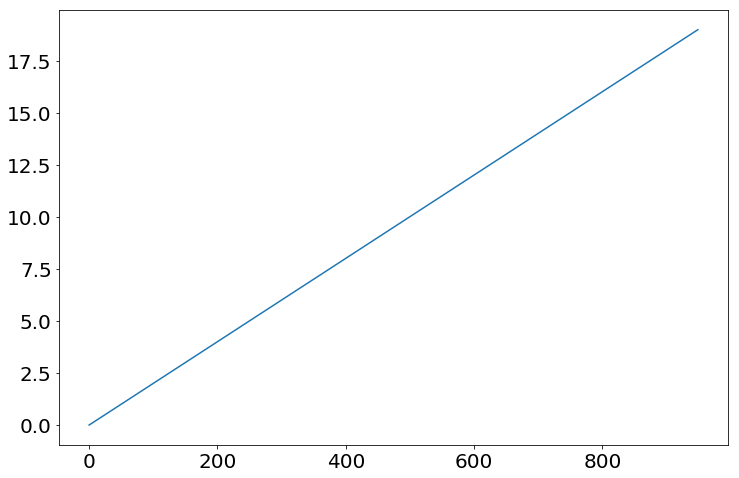

In [245]:
plt.plot(ii)

In [247]:
from itertools import product

In [257]:
xy  = np.array(list(product(*xymap._xs)))
z   = xymap._fs.flatten()

xytest = np.array(list(product(np.linspace(-200, 200, 1000),
                               np.linspace(-200, 200, 1000))))
iii = griddata(xy, z, xytest, "nearest")

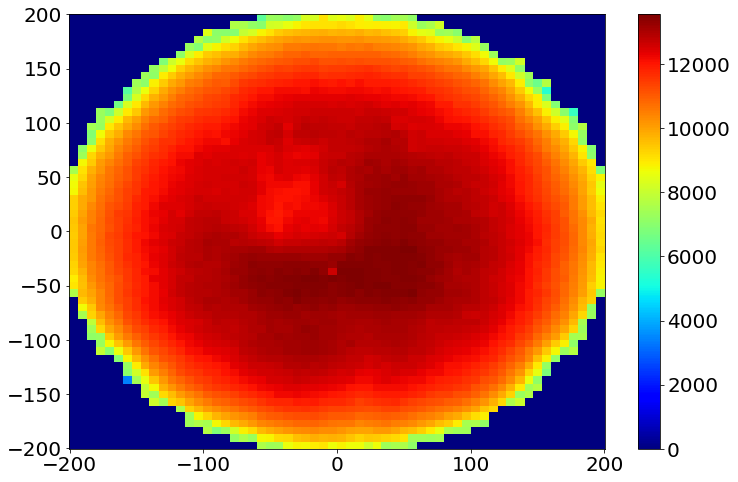

In [258]:
display_matrix(np.linspace(-200, 200, 1000), np.linspace(-200, 200, 1000), iii, cmap="jet");

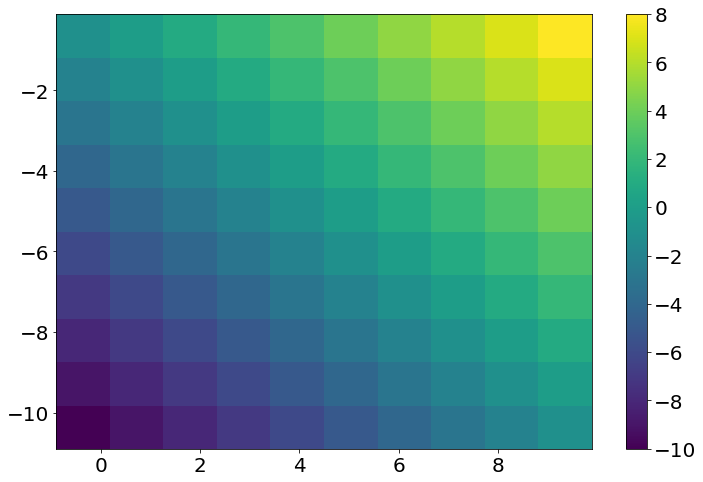

In [271]:
grid_points = np.array([(i, j) for i in range(  0, 10)\
                               for j in range(-10,  0)])
grid_values = np.sum(grid_points, axis=1)

display_matrix(np.unique(grid_points[:,0]),
               np.unique(grid_points[:,1]),
               grid_values.reshape(10, 10));

In [276]:
from functools import partial
from itertools import product

import numpy as np
from scipy.interpolate import griddata

from invisible_cities.core                     import fit_functions as fitf
from invisible_cities.core.exceptions          import ParameterNotSet
from invisible_cities. evm.ic_containers       import Measurement


opt_nearest = {"interp_method": "nearest"}
opt_linear  = {"interp_method": "linear" ,
               "default_f"    :     1    ,
               "default_u"    :     0    }
opt_cubic   = {"interp_method":  "cubic" ,
               "default_f"    :     1    ,
               "default_u"    :     0    }


class Correction:
    """
    Interface for accessing any kind of corrections.

    Parameters
    ----------
    xs : np.ndarray
        Array of coordinates corresponding to each correction.
    fs : np.ndarray
        Array of corrections or the values used for computing them.
    us : np.ndarray
        Array of uncertainties or the values used for computing them.
    norm_strategy : False or string
        Flag to set the normalization option. Accepted values:
        - False:    Do not normalize.
        - "max":    Normalize to maximum energy encountered.
        - "index":  Normalize to the energy placed to index (i,j).
    default_f, default_u : floats
        Default correction and uncertainty for missing values (where fs = 0).
    """

    def __init__(self,
                 xs, fs, us,
                   norm_strategy = False,
                   norm_opts     = {},
                 interp_method   = "nearest",
                 default_f       = 0,
                 default_u       = 0):

        self._xs = [np.array( x, dtype=float) for x in xs]
        self._fs =  np.array(fs, dtype=float)
        self._us =  np.array(us, dtype=float)

        self.norm_strategy   =   norm_strategy
        self.norm_opts       =   norm_opts
        self.interp_method   = interp_method
        self.default_f       = default_f
        self.default_u       = default_u

        self._normalize        (  norm_strategy,
                                  norm_opts    )
        self._init_interpolator(interp_method  , default_f, default_u)

    def __call__(self, *xs):
        """
        Compute the correction factor.

        Parameters
        ----------
        *x: Sequence of nd.arrays
             Each array is one coordinate. The number of coordinates must match
             that of the `xs` array in the init method.
        """
        x = np.array(xs, ndmin=2).T
        return Measurement(self._get_value      (x).flatten(),
                           self._get_uncertainty(x).flatten())

    def _init_interpolator(self, method, default_f, default_u):
        coordinates           = np.array(list(product(*self._xs)))
        self._get_value       = partial(griddata,
                                        coordinates,
                                        self._fs.flatten(),
                                        method     = method,
                                        fill_value = default_f)

        self._get_uncertainty = partial(griddata,
                                        coordinates,
                                        self._us.flatten(),
                                        method     = method,
                                        fill_value = default_u)

    def _normalize(self, strategy, opts):
        if not strategy           : return

        elif   strategy == "const":
            if "value" not in opts:
                raise ParameterNotSet(("Normalization strategy 'const' requires"
                                       "the normalization option 'value'"))
            f_ref = opts["value"]
            u_ref = 0

        elif   strategy == "max"  :
            index = np.argmax(self._fs)
            f_ref = self._fs[index]
            u_ref = self._us[index]

        elif   strategy == "index":
            if "index" not in opts:
                raise ParameterNotSet(("Normalization strategy 'index' requires"
                                       "the normalization option 'index'"))
            index = opts["index"]
            f_ref = self._fs[index]
            u_ref = self._us[index]

        else:
            raise ValueError("Normalization strategy not recognized: {}".format(strategy))

        assert f_ref > 0, "Invalid reference value."

        valid    = (self._fs > 0) & (self._us > 0)
        valid_fs = self._fs[valid].copy()
        valid_us = self._us[valid].copy()

        # Redefine and propagate uncertainties as:
        # u(F) = F sqrt(u(F)**2/F**2 + u(Fref)**2/Fref**2)
        self._fs[ valid]  = f_ref / valid_fs
        self._us[ valid]  = np.sqrt((valid_us/valid_fs)**2 +
                                    (   u_ref/f_ref   )**2 )
        self._us[ valid] *= self._fs[valid]

        # Set invalid to defaults
        self._fs[~valid]  = self.default_f
        self._us[~valid]  = self.default_u

    def __eq__(self, other):
        for i, x in enumerate(self._xs):
            if not np.allclose(x, other._xs[i]):
                return False

        if not np.allclose(self._fs, other._fs):
            return False

        if not np.allclose(self._us, other._us):
            return False

        return True

In [307]:
xmin, xmax  = 10, 20
ymin, ymax  = 20, 30
grid_x      = np.arange(xmin, xmax)
grid_y      = np.arange(ymin, ymax)
grid_points = np.array([(i, j) for i in grid_x\
                               for j in grid_y])

grid_fun    = lambda x: x[0]
grid_values = np.apply_along_axis(grid_fun, 1, grid_points)
grid_uncert = np.apply_along_axis(grid_fun, 1, grid_points)/10

correct = Correction((grid_x, grid_y),
                     grid_values,
                     grid_uncert,
                     **opt_linear)

In [281]:
correct._xs

[array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.]),
 array([ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.])]

In [ ]:
correct([14.4], [24])
correct(14.4, 24)

In [327]:
def doit(*x):
    return np.array(x, ndmin=2).T
print(doit([14.4], [24]))
print(doit( 14.4,   24 ))

[[ 14.4  24. ]]
[[ 14.4]
 [ 24. ]]


In [339]:
griddata(np.arange(10)[:, None], np.arange(10), np.arange(10)[:, None])

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.]])

In [342]:
griddata(np.arange(10)[:, None], np.arange(10), [1,2,3])

array([ 1.,  2.,  3.])

In [338]:
coordinates = list(product(*correct._xs))
values      = correct._fs.flatten() 
griddata(coordinates, values, doit(10
                                   
                                   , 12))

ValueError: number of dimensions in xi does not match x

In [312]:
x_test  = np.random.uniform(xmin, xmax-1, size=100)
y_test  = np.random.uniform(ymin, ymax-1, size=100)
xy_test = np.stack([x_test, y_test], axis=1)

correction      = correct(x_test, y_test)
expected_values = np.apply_along_axis(grid_fun, 1, xy_test)
expected_uncert = expected_values/10

In [313]:
correct(x_test, y_test)

Measurement(value=array([ 12.68600798,  18.52825869,  13.31046881,  16.11309407,
        17.89543822,  11.65714222,  12.30632841,  16.95876021,
        14.95856581,  12.44898799,  18.84958747,  11.94534518,
        11.33433086,  17.39617821,  17.99087782,  13.33821016,
        16.75103952,  12.46395992,  13.62562678,  14.77399627,
        10.48226931,  10.39303948,  11.560598  ,  15.74094068,
        16.77266897,  18.31820251,  16.05986901,  12.61711211,
        14.45324536,  10.03720808,  17.69394171,  12.95733067,
        16.19180027,  16.64924327,  14.20897882,  17.34074716,
        10.21214065,  10.91894079,  16.25448245,  13.97304116,
        13.50842741,  14.83066574,  18.86196823,  15.53948379,
        12.38568447,  12.66929201,  10.22039153,  11.27022565,
        18.34347027,  14.4711677 ,  13.38409897,  15.85231633,
        17.95757194,  18.88608756,  18.60284308,  17.6762021 ,
        10.36446088,  16.32821824,  14.99678945,  12.88540989,
        18.82225242,  16.00473548,  1

In [308]:
print(correction.value - expected_values)
print()
print(np.mean(correction.value - expected_values))
assert np.allclose(correction.value      , expected_values)
assert np.allclose(correction.uncertainty, expected_uncert)

[  0.           0.           0.           0.         -17.58848246   0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.         -18.95850863   0.           0.           0.           0.
 -12.88176146   0.           0.           0.           0.           0.           0.
 -11.52901155   0.           0.           0.           0.         -12.70213745
   0.           0.         -12.57911128 -18.41995124   0.           0.           0.
 -15.73808115 -15.11048295   0.          -9.31998705   0.           0.           0.
   0.           0.           0.           0.         -10.42137739   0.
 -10.68933825   0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.         -18.30839393   0.           0.           0.           0.           0.
 -18.82046982   0.     

AssertionError: 

In [ ]:
coordinates = zip(*map(np.ndarray.flatten, np.meshgrid(*self.xs)))